# Feature extraction

## Introduction
Big data is a reality and many a time we deal with hundreds of features present in a dataset. If number of features are similar or bigger than number of observations, then overfitting can become a major issue. Feature extraction is one method that can help us to avoid this type of issue. For example: improve the accuracy of the model, overfitting issue, etc. Feature extraction creates new feature and reduces the number of current features. The newly created features mostly contain all information from original dataset. 


There are many methods, here we are going to discuss one of the most commonly used method:
-	Principal Component Analysis (PCA)




## Principal Component Analysis:
-	PCA is a statistical method used in unsupervised machine learning technique and dimensionality reduction technique
-	We convert numerical predictors into a set of uncorrelated features developed as a linear combination of predictors (known as principal components) which explains the maximum variation in the data.
-	These newly created features are known as principal component (PC).
-	Higher dimensional data to lower dimensional data and very commonly used for EDA and predictive modelling.
-	First principal component (PC1) captures the maximum variance. It determines the direction of highest variability in the data.
-	Second principal component (PC2) captures the remaining variance and is uncorrelated to the PC1 and these 2 are orthogonal


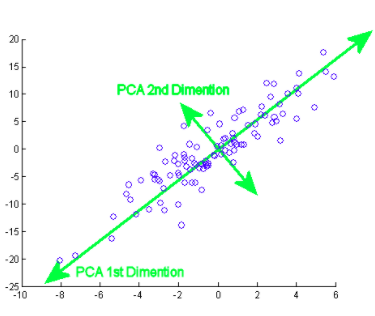

In [ ]:
from IPython.display import Image
Image(filename='PC.png') 

### Application:
- Data visualization
- Image processing
- Movie recommendation
- Computer vision


In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data

In [ ]:
breast_data.shape

(569, 30)

In [ ]:
breast_labels = breast.target # load the labels and check the shape

In [ ]:
breast_labels.shape

(569,)

In [ ]:
labels = np.reshape(breast_labels,(569,1)) 

In [ ]:
final_breast_data = np.concatenate([breast_data,labels],axis=1) # breast_labels to concatenate it with the breast_data 

In [ ]:
final_breast_data.shape

(569, 31)

In [ ]:
breast_dataset = pd.DataFrame(final_breast_data)

In [ ]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
features_labels = np.append(features,'label')

In [ ]:
breast_dataset.columns = features_labels

In [ ]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# Since the original labels are in 0,1 format, you will change the labels to benign and malignant using .replace function. You will use inplace=True which will modify the dataframe breast_dataset.
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [ ]:
np.mean(x),np.std(x) # whether the normalized data has a mean of zero and a standard deviation of one.

(-6.826538293184326e-17, 1.0)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])] # convert the normalized features into a tabular format with the help of DataFrame

In [ ]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [ ]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [ ]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['PC1', 'PC2'])

In [ ]:
principal_breast_Df.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [ ]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


you can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

<Figure size 432x288 with 0 Axes>

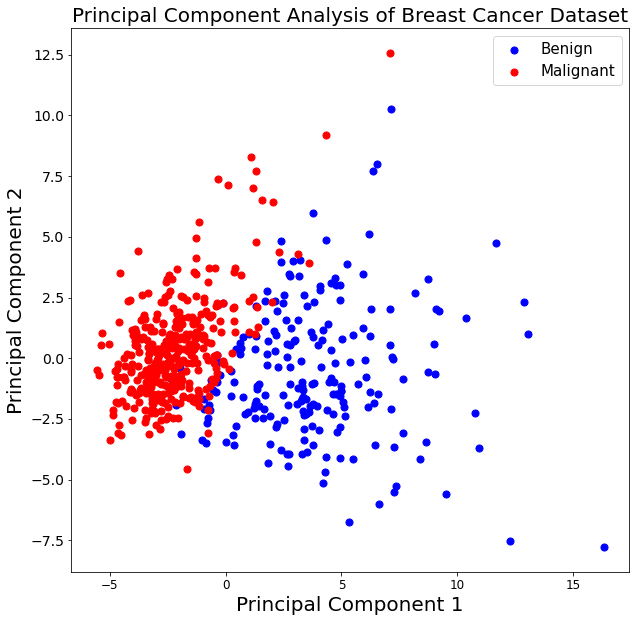

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'PC1']
               , principal_breast_Df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

- next these PC1 and PC2 can be used for machine learning model also